In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od 

url = (
    "https://www.kaggle.com/competitions/jigsaw-unintended-"
    "bias-in-toxicity-classification/data"
)

od.download(url)

100%|██████████| 723M/723M [00:08<00:00, 88.4MB/s]



Extracting archive ./jigsaw-unintended-bias-in-toxicity-classification/jigsaw-unintended-bias-in-toxicity-classification.zip to ./jigsaw-unintended-bias-in-toxicity-classification


In [3]:
!ls -lh jigsaw-unintended-bias-in-toxicity-classification

total 2.3G
-rw-r--r-- 1 root root 874M Jan  5 10:45 all_data.csv
-rw-r--r-- 1 root root 102M Jan  5 10:45 identity_individual_annotations.csv
-rw-r--r-- 1 root root 1.2M Jan  5 10:45 sample_submission.csv
-rw-r--r-- 1 root root  29M Jan  5 10:45 test.csv
-rw-r--r-- 1 root root  43M Jan  5 10:45 test_private_expanded.csv
-rw-r--r-- 1 root root  43M Jan  5 10:45 test_public_expanded.csv
-rw-r--r-- 1 root root 399M Jan  5 10:45 toxicity_individual_annotations.csv
-rw-r--r-- 1 root root 779M Jan  5 10:45 train.csv


In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)


df = pd.read_csv("./jigsaw-unintended-bias-in-toxicity-classification/train.csv")

In [5]:
df.sample(5)

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
1312240,5718915,0.000000,We need to build a wall.,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-08-05 14:40:31.297546+00,54,NaN,363161,rejected,0,0,0,0,0,0.0,4,4
446988,791218,0.166667,Will it REALLY be your last?,0.0,0.0,0.0,0.0,0.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-05 00:50:06.642803+00,53,788966.0,159788,approved,3,0,0,0,0,0.0,0,6
474120,825582,0.300000,"This is one of those letters you write, put in...",0.0,0.0,0.1,0.2,0.000000,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-01-11 20:12:47.609490+00,53,NaN,161267,approved,0,1,0,11,0,0.0,6,10
737962,5024523,0.000000,All these cuts because the legislature gave ou...,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-03-19 03:23:12.611980+00,21,NaN,319508,approved,0,0,0,0,0,0.0,0,4
899889,5220730,0.600000,Fake new outlet?\n\nG. S. deAuxerre --> MUTED....,0.0,0.0,0.0,0.6,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-05-05 19:56:17.340196+00,54,5220342.0,332268,approved,0,0,0,3,0,0.0,0,10


In [6]:
df.shape

(1804874, 45)

In [7]:
df.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [9]:
df.isna().sum()

id                                           0
target                                       0
comment_text                                 0
severe_toxicity                              0
obscene                                      0
identity_attack                              0
insult                                       0
threat                                       0
asian                                  1399744
atheist                                1399744
bisexual                               1399744
black                                  1399744
buddhist                               1399744
christian                              1399744
female                                 1399744
heterosexual                           1399744
hindu                                  1399744
homosexual_gay_or_lesbian              1399744
intellectual_or_learning_disability    1399744
jewish                                 1399744
latino                                 1399744
male         

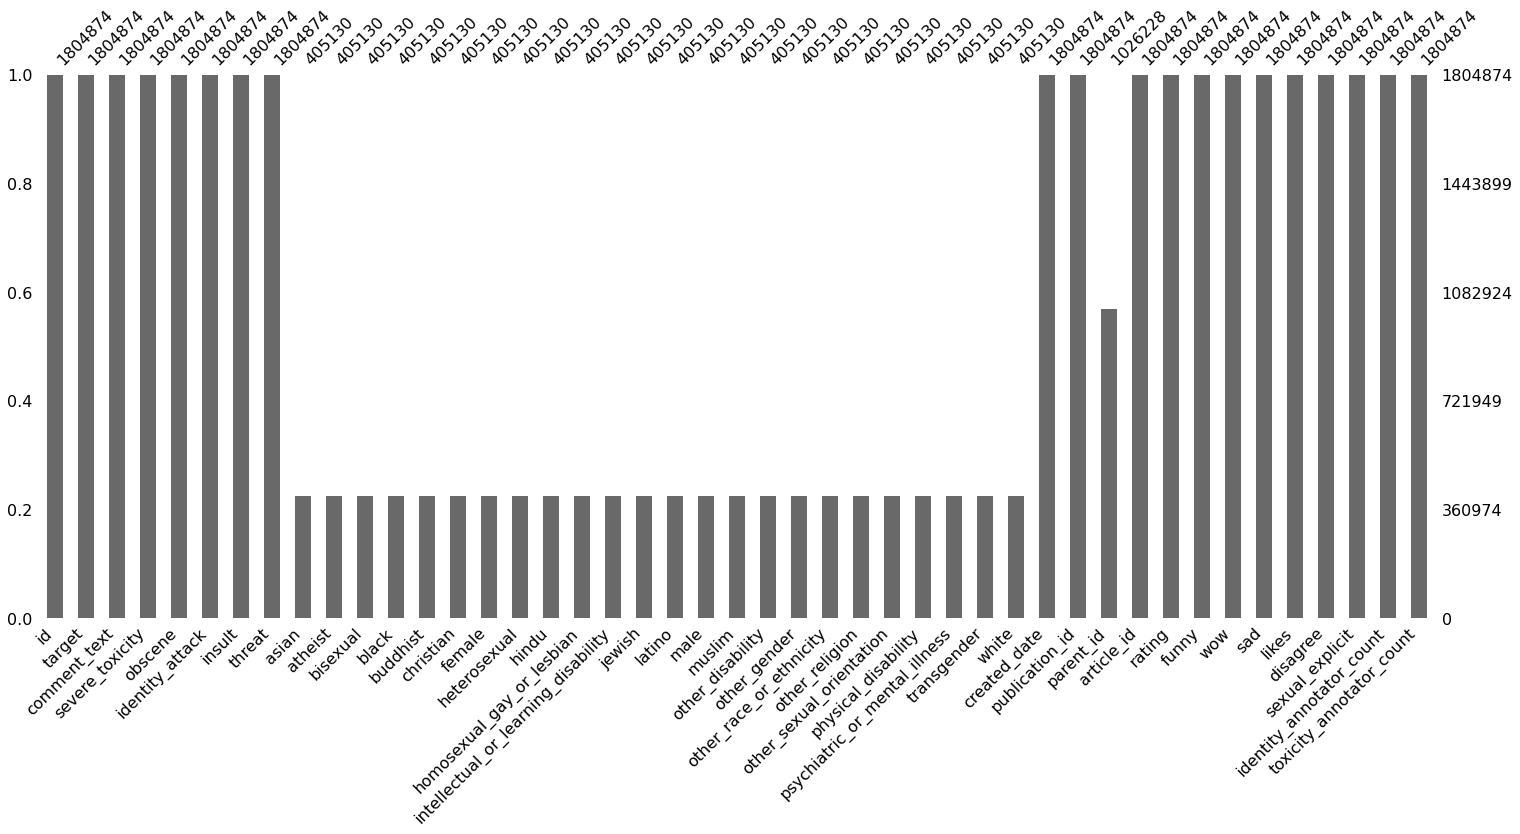

In [10]:
import missingno as msno

msno.bar(df)

In [20]:
df = df.drop(
    columns=['id', 'target', 'created_date', 
             'publication_id', 'parent_id', 'article_id', 
             'rating', 'identity_annotator_count', 'toxicity_annotator_count']
    )

df.columns

Index(['comment_text', 'severe_toxicity', 'obscene', 'identity_attack',
       'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist',
       'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit'],
      dtype='object')

In [21]:
X = df['comment_text']
y = df.iloc[:, 1:]

In [22]:
y.columns

Index(['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat',
       'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian',
       'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian',
       'intellectual_or_learning_disability', 'jewish', 'latino', 'male',
       'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity',
       'other_religion', 'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit'],
      dtype='object')

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(
    num_words=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' '
)

tokenizer.fit_on_texts(X)
print("Data fitted on the tokenizer")

Data fitted on the tokenizer


In [24]:
n_vocab = len(tokenizer.word_index.items()) + 1
print(f"Vocabulary size: {n_vocab}")

print("\nWords at the top")
print('\t', dict(list(tokenizer.word_index.items())[:10]))
print("\nWords at the bottom")
print('\t', dict(list(tokenizer.word_index.items())[-10:]))

Vocabulary size: 397709

Words at the top
	 {'the': 1, 'to': 2, 'and': 3, 'of': 4, 'a': 5, 'is': 6, 'in': 7, 'that': 8, 'for': 9, 'you': 10}

Words at the bottom
	 {'mxcarthyism': 397699, 'socioligists': 397700, 'sociologyguide': 397701, 'kyrcakyyeg4': 397702, 'nonadult': 397703, 'googooes': 397704, 'salman’s': 397705, 'viny': 397706, 'nondisabled': 397707, '1412': 397708}


## Build a Tokenizer (Refined)

Here, we will restrict the vocabulary to 200000 and eleminate words except the first most common 200000 words


In [25]:
MAX_FEATURES = 200000 + 1 # number of words in the vocab

tokenizer = Tokenizer(
    num_words=MAX_FEATURES-1,
    oov_token='',
)

tokenizer.fit_on_texts(X.values)
print("Data fitted on the tokenizer")

Data fitted on the tokenizer


In [27]:
X[200]

'To meet these people with threats of violence and/or humiliation, or anything other than personal dignity is playing right into their hand or opening "this side" up to opposition, and adding energy to their game. I agree in shutting off power and phone, jamming wi-if and blocking any access into the area. You didn\'t plan well and forgot necessities? Tough. What happens when you go camping and forgot to pack whatever? You go without, borrow from your mates, (if they\'re willing to share) or cut the trip short. Y\'all got yourselves into this jam, don\'t be expecting for those you are flipping off to be accomadating. As a sign in a supply house said, "Poor planning on your part, does not constitute an emergency on ours". Read \'em and weep, girls. Oh, and I\'d say, last one out, turn down the heat and turn off the lights, but if it were up to me, you wouldn\'t have to worry about it'

In [28]:
print(f"Original: {X[200][:100]}")
print(f"Sequence IDs: {tokenizer.texts_to_sequences([X[200][:100]])[0]}")


Original: To meet these people with threats of violence and/or humiliation, or anything other than personal di
Sequence IDs: [3, 1134, 87, 43, 20, 2413, 5, 657, 4, 24, 11499, 24, 188, 74, 65, 487, 13990]


## Converting all documents to word ID sequences

In [29]:
new_sequences = tokenizer.texts_to_sequences(X.values)

## Generating data (positive + negative candidates)

In [31]:
import tensorflow as tf
import random


n_vocab=MAX_FEATURES
sampling_table = tf.keras.preprocessing.sequence.make_sampling_table(n_vocab, sampling_factor=1e-05)

def skip_gram_data_generator(sequences, window_size, batch_size, negative_samples, vocab_size, seed=None):
    
    rand_sequence_ids = np.arange(len(sequences))                    
    np.random.shuffle(rand_sequence_ids)


    for si in rand_sequence_ids:
        
        positive_skip_grams, _ = tf.keras.preprocessing.sequence.skipgrams(
            sequences[si], 
            vocabulary_size=vocab_size, 
            window_size=window_size, 
            negative_samples=0.0, 
            shuffle=False,
            sampling_table=sampling_table,
            seed=seed
        )
        
        targets, contexts, labels = [], [], []
        
        for target_word, context_word in positive_skip_grams:
            context_class = tf.expand_dims(tf.constant([context_word], dtype="int64"), 1)
            
            negative_sampling_candidates, _, _ = tf.random.log_uniform_candidate_sampler(
              true_classes=context_class,
              num_true=1,
              num_sampled=negative_samples,
              unique=True,
              range_max=vocab_size,              
              name="negative_sampling")

            # Build context and label vectors (for one target word)
            context = tf.concat(
                [tf.constant([context_word], dtype='int64'), negative_sampling_candidates],
                axis=0
            )


            
            label = tf.constant([1] + [0]*negative_samples, dtype="int64")

            # Append each element from the training example to global lists.
            targets.extend([target_word]*(negative_samples+1))
            contexts.append(context)
            labels.append(label)

        contexts, targets, labels = np.concatenate(contexts), np.array(targets), np.concatenate(labels)
        
        assert contexts.shape[0] == targets.shape[0]
        assert contexts.shape[0] == labels.shape[0]
        
        # If seed is not provided generate a random one
        if not seed:
            seed = random.randint(0, 10e6)
            
        np.random.seed(seed)
        np.random.shuffle(contexts)
        np.random.seed(seed)
        np.random.shuffle(targets)


        np.random.seed(seed)
        np.random.shuffle(labels)
        
    
        for eg_id_start in range(0, contexts.shape[0], batch_size):            
            yield (
                targets[eg_id_start: min(eg_id_start+batch_size, targets.shape[0])], 
                contexts[eg_id_start: min(eg_id_start+batch_size, contexts.shape[0])]
            ), labels[eg_id_start: min(eg_id_start+batch_size, labels.shape[0])]


new_skip_gram_gen = skip_gram_data_generator(
    new_sequences, 4, 10, 5, n_vocab
)

for btc, bl in new_skip_gram_gen:
    
    print(btc)
    print(bl)
    
    break

(array([ 1735,  4557,   167,    44,   195,  3629,  1735, 20012,   167,
        1735]), array([ 5529,   172,     1,     9,   605,    11, 24780,  3237,  2468,
         781]))
[0 0 0 1 0 0 0 0 0 1]


## Skip-Gram Algorithm
Defining Hyperparameters

Here we define several hyperparameters including batch_size (amount of samples in a single batch) embedding_size (size of embedding vectors) window_size (context window size).


In [33]:
batch_size = 4096 # Data points in a single batch

embedding_size = 128 # Dimension of the embedding vector.

window_size=1 # We use a window size of n on either side of target word
negative_samples = 4 # Number of negative samples generated per example

epochs = 5 # Number of epochs to train for

# We pick a random validation set to sample nearest neighbors
valid_size = 16 # Random set of words to evaluate similarity on.
# We sample valid datapoints randomly from a large window without always being deterministic
valid_window = 250

# When selecting valid examples, we select some of the most frequent words as well as
# some moderately rare words as well
np.random.seed(54321)
random.seed(54321)

valid_term_ids = np.array(random.sample(range(valid_window), valid_size))
valid_term_ids = np.append(
    valid_term_ids, random.sample(range(1000, 1000+valid_window), valid_size),
    axis=0
)

In [34]:
import tensorflow.keras.backend as K

K.clear_session()

# Inputs - skipgrams() function outputs target, context in that order
# we will use the same order
input_1 = tf.keras.layers.Input(shape=(), name='target')
input_2 = tf.keras.layers.Input(shape=(), name='context')

# Two embeddings layers are used one for the context and one for the target
context_embedding_layer = tf.keras.layers.Embedding(
    input_dim=n_vocab, output_dim=embedding_size, name='context_embedding'
)
target_embedding_layer = tf.keras.layers.Embedding(
    input_dim=n_vocab, output_dim=embedding_size, name='target_embedding'
)

# Lookup outputs of the embedding layers
target_out = target_embedding_layer(input_1)
context_out = context_embedding_layer(input_2)

# Computing the dot product between the two 
out = tf.keras.layers.Dot(axes=-1)([context_out, target_out])

# Defining the model
skip_gram_model = tf.keras.models.Model(inputs=[input_1, input_2], outputs=out, name='skip_gram_model')

# Compiling the model
skip_gram_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
    optimizer='adam'
)

skip_gram_model.summary()

Model: "skip_gram_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 context (InputLayer)           [(None,)]            0           []                               
                                                                                                  
 target (InputLayer)            [(None,)]            0           []                               
                                                                                                  
 context_embedding (Embedding)  (None, 128)          25600128    ['context[0][0]']                
                                                                                                  
 target_embedding (Embedding)   (None, 128)          25600128    ['target[0][0]']                 
                                                                                    

## Calculating Word Similarities

We calculate the similarity between two given words in terms of the cosine distance. To do this efficiently we use matrix operations to do so, as shown below. Furthermore, we define the computations as a callback, which will automatically run at the end of an epoch during model training.


In [35]:
class ValidationCallback(tf.keras.callbacks.Callback):
    
    def __init__(self, valid_term_ids, model_with_embeddings, tokenizer):
        
        self.valid_term_ids = valid_term_ids
        self.model_with_embeddings = model_with_embeddings
        self.tokenizer = tokenizer
        
        super().__init__()
        
    def on_epoch_end(self, epoch, logs=None):
        """ Validation logic """
                
        # We will use context embeddings to get the most similar words
        # Other strategies include: using target embeddings, mean embeddings after avaraging context/target
        embedding_weights = self.model_with_embeddings.get_layer("context_embedding").get_weights()[0]
        normalized_embeddings = embedding_weights / np.sqrt(np.sum(embedding_weights**2, axis=1, keepdims=True))
        
        # Get the embeddings corresponding to valid_term_ids
        valid_embeddings = normalized_embeddings[self.valid_term_ids, :]
        
        # Compute the similarity between valid_term_ids and all the embeddings
        # V x d (d x D) => V x D
        top_k = 5 # Top k items will be displayed
        similarity = np.dot(valid_embeddings, normalized_embeddings.T)
        
        # Invert similarity matrix to negative
        # Ignore the first one because that would be the same word as the probe word
        similarity_top_k = np.argsort(-similarity, axis=1)[:, 1: top_k+1]
                
        # Print the output
        for i, term_id in enumerate(valid_term_ids):
            
            similar_word_str = ', '.join([self.tokenizer.index_word[j] for j in similarity_top_k[i, :] if j >= 1])
            print(f"{self.tokenizer.index_word[term_id]}: {similar_word_str}")
        
        print('\n')